# **CNN Model for Car Name Prediction**
This notebook provides a CNN model to predict the names of cars.

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Loading dataset

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/Project/Images2", #Image folder for raw data and Image2 folder for augmented data
    shuffle=True,
    image_size=(270,180),
    batch_size=32
)

Found 13360 files belonging to 4 classes.


#Split data into test and train using data_splitor function

In [9]:
def data_splitor(dataset, train=0.8, test=0.2, val=0.2):
    """
    Splits a dataset into training, testing, and validation subsets.

    Parameters:
    dataset : dataset object
        The dataset to be split, typically a TensorFlow dataset.
    train : float, optional
        Proportion of the dataset to be used for training (default is 0.8).
    test : float, optional
        Proportion of the dataset to be used for testing (default is 0.2).
    val : float, optional
        Proportion of the testing dataset to be used for validation (default is 0.2).

    Returns:
    tuple
        A tuple containing the training, testing, and validation datasets in that order.

    Notes:
    - The proportions for 'train' and 'test' must sum to 1.0 to cover the entire dataset.
    - The 'val' proportion is applied to the test dataset to split it into test and validation datasets.
    - The function assumes the dataset supports the `take` and `skip` methods, typical of TensorFlow datasets.

    Example:
    >>> train_ds, test_ds, val_ds = data_splitor(dataset, train=0.7, test=0.3, val=0.5)
    """
    total_num = len(dataset)
    n_train = int(train * total_num)
    train_dataset = dataset.take(n_train)
    test_dataset = dataset.skip(n_train)
    n_test = int(total_num - n_train)
    n_val = int(val * n_test)
    val_dataset = test_dataset.take(n_val)
    test_dataset = test_dataset.skip(n_val)
    return train_dataset, test_dataset, val_dataset


In [ ]:
train_ds, test_ds, val_ds = data_splitor(dataset)

#Model

In [3]:
model = models.Sequential([
    layers.experimental.preprocessing.Resizing(256,256),
    layers.experimental.preprocessing.Rescaling(1.0/255),
    layers.Conv2D(32,(3,3),activation="relu",input_shape=(32,256,256,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(512,activation="relu"),
    layers.Dense(128,activation="relu"),
    layers.Dense(4,activation="softmax")
])
model.build((32,270,180,3))

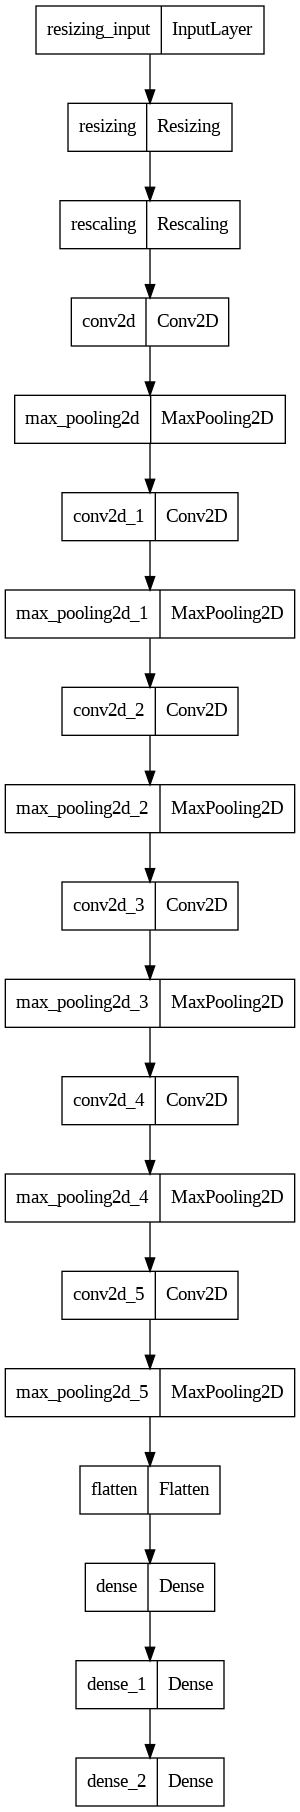

In [8]:
plot_model(model)

In [ ]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"]
)

In [ ]:
model.fit(
    train_ds,
    epochs=20,
    batch_size=32,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/20
334/334 [==============================] - 209s 626ms/step - loss: 1.3405 - accuracy: 0.3527 - val_loss: 1.3259 - val_accuracy: 0.3555
Epoch 2/20
334/334 [==============================] - 225s 672ms/step - loss: 1.1884 - accuracy: 0.4583 - val_loss: 1.0388 - val_accuracy: 0.5273
Epoch 3/20
334/334 [==============================] - 245s 734ms/step - loss: 0.9190 - accuracy: 0.6044 - val_loss: 0.7825 - val_accuracy: 0.6797
Epoch 4/20
334/334 [==============================] - 236s 707ms/step - loss: 0.7051 - accuracy: 0.7064 - val_loss: 0.7084 - val_accuracy: 0.6992
Epoch 5/20
334/334 [==============================] - 249s 745ms/step - loss: 0.5877 - accuracy: 0.7551 - val_loss: 0.6119 - val_accuracy: 0.7500
Epoch 6/20
334/334 [==============================] - 248s 743ms/step - loss: 0.4695 - accuracy: 0.8075 - val_loss: 0.5649 - val_accuracy: 0.7871
Epoch 7/20
334/334 [==============================] - 276s 827ms/step - loss: 0.3994 - accuracy: 0.8380 - val_loss: 0.5845 -

#Test results

In [ ]:
results = model.evaluate(test_ds)

68/68 [==============================] - 12s 156ms/step - loss: 1.0297 - accuracy: 0.8139
